In [1]:
from brian2 import *

start_scope()

In [2]:
tau = 10*ms
Vt = -50*mV
Vr = -65*mV
El = -65*mV
R = 10*Mohm
I = 2.5*nA

eqs = '''
        dV/dt = (-(V-El)  +R*I)/tau : volt
    '''

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Text(0.5, 1.0, 'Leaky Integrate and Fire Neuron')

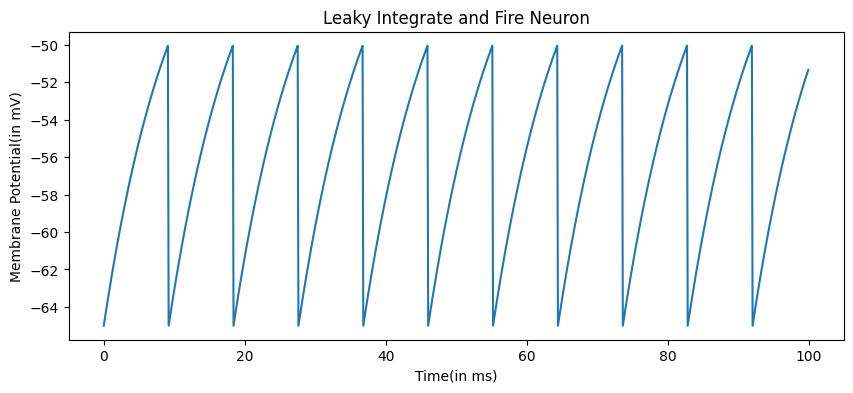

In [3]:
G = NeuronGroup(1, model = eqs, threshold = 'V>Vt', reset = 'V = Vr', method = 'exact')
G.V = El
M = StateMonitor(G, 'V', record = 0)
spikemon = SpikeMonitor(G)
run(100*ms)

figure(figsize = (10,4))
plot(M.t/ms, M.V[0]/mV)
xlabel('Time(in ms)')
ylabel('Membrane Potential(in mV)')
title('Leaky Integrate and Fire Neuron')